## Search and read CMIP6 data by using xarray

In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy as cy
import cartopy.crs as ccrs
import functions
%matplotlib inline

### open CMIP6 online catalog
### data from CMIP6 of DMS for fully coupled model simulations (ocean + atmosphere).
### 

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(variable_id=['dmso'],experiment_id=['historical'])
#cat = col.search(variable_id=['emidms'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


## Load DMS data from CNRM_ESM2-1, historical experiment if they are in the pangeo

In [4]:
cat = col.search(variable_id=['dmso'],source_id=['CNRM-ESM2-1'],
 activity_id = ['CMIP'], experiment_id=['historical'], table_id=['Omon'], 
                  member_id=['r1i1p1f2']
                )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [5]:
### data from CMIP6 of DMS for OMIP model simulations, where the atmosphere is prescribed. These data are in a bucket and not in pangeo
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [6]:
list(dset_dict.keys())

['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [7]:
dset = dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
dset = dset.isel(lev=0).squeeze()
dset

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

### get the meta data corresponding to the DMSO

In [8]:
print(dset['dmso'])

<xarray.DataArray 'dmso' (time: 1980, y: 294, x: 362)>
dask.array<getitem, shape=(1980, 294, 362), dtype=float32, chunksize=(4, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev        float64 0.5058
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Mole Concentration of Dimethyl Sulphide in sea water
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Mole Concentration of Dimethyl Sulphide in sea water
    online_operation:    average
    standard_name:       mole_concentration_of_dimethyl_sulfide_in_sea_water
    u

In [9]:
dset.time.values

array([cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2014, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)

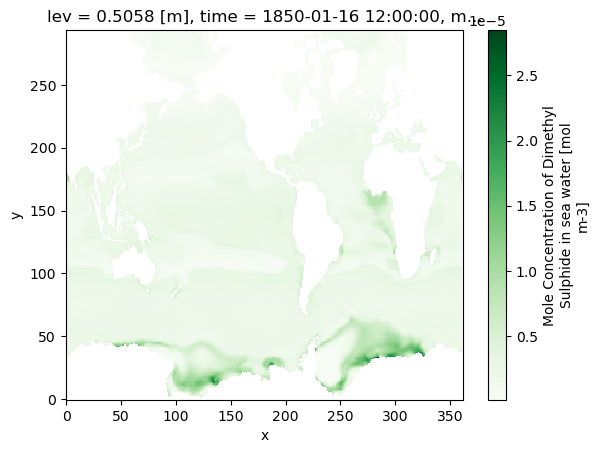

In [60]:
dset['dmso'].sel(time=cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, has_year_zero=False)).plot(cmap = 'Greens')
#                 method='nearest')

## choosing the area of interest. Here we are interested in arctic and speciffically Greenland
### There are two ways of doing it:
- where function
- slice function

### 1- selecting the area using where function and plotting it

In [65]:
#dset_GLarea_test = dset.where((dset.lon>=-30) & (dset.lon<=10) & (dset.lat <= 85)  & (dset.lat >= 60),
#                         drop=True).sel(
#                         time=cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, has_year_zero=False)).compute()
##dset_GLarea['dmso'].plot.contourf(cmap='YlOrRd')
dset_GLarea_test = dset.where((dset.lon>=-180) & (dset.lon<=180) & (dset.lat <= 90)  & (dset.lat >= 40),
                         drop=True).sel(
                         time=cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, has_year_zero=False)).compute()
dset_GLarea_test


<xarray.Dataset>
Dimensions:      (y: 87, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 37.64 37.64 38.17 ... 50.11 50.11 49.98
    bounds_lon   (y, x, nvertex) float64 72.01 73.0 73.0 ... 73.0 72.95 73.0
    lat          (y, x) float64 37.91 37.91 37.91 37.91 ... 50.23 50.01 50.01
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 0.0 1.024
    lon          (y, x) float64 72.5 73.5 74.49 75.48 ... 73.05 73.04 73.0 72.99
    time         object 1850-03-16 12:00:00
    time_bounds  (axis_nbounds) object 1850-03-01 00:00:00 1850-04-01 00:00:00
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

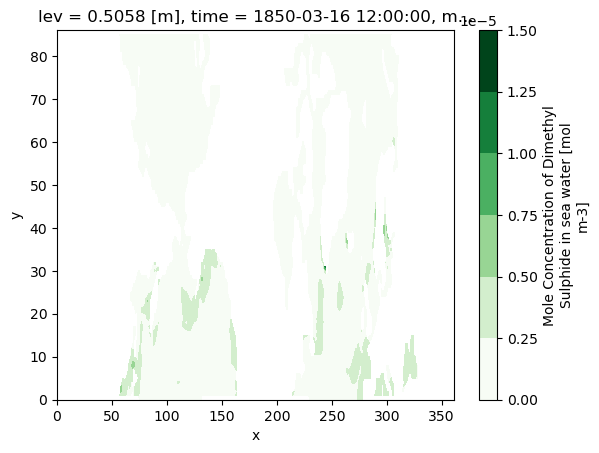

In [66]:
dset_GLarea_test['dmso'].plot.contourf(cmap='Greens')

### 2- selecting the area using slice function

In [13]:
dset_GLarea2 = dset.sel(lat=slice(54.5,71.5), lon=slice(-2.5,42.5))
dset_GLarea2

KeyError: "no index found for coordinate 'lat'"

#### Note: 
##### looking at the data attribute, one can find that one cannot a 'star', sign for the lon and lat. Therefore one should choose another variable to slice with that is assigned with "star",. In the dmso data, the time is assigned/labeled with '*', so I'll choose it to make the slice.

In [68]:
dset_GLarea = dset.where((dset.lon>=-180) & (dset.lon<=180) & (dset.lat <= 90)  & (dset.lat >= 45),
                         drop=True).compute()
#dset_GLarea['dmso'].plot.contourf(cmap='YlOrRd')
dset_GLarea['dmso']

<xarray.DataArray 'dmso' (time: 1980, y: 80, x: 362)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    lat        (y, x) float64 41.13 41.13 41.13 41.13 ... 50.23 50.01 50.01
    lev        float64 0.5058
    lon        (y, x) float64 72.51 73.49 74.47 75.45 ... 73.05 73.04 73.0 72.99
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Mole Concentration of Dimethyl Sulphide in sea water
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Mole Concentration of Dimethyl Sulphide in sea water
    online_operation:    average
    standard_name:       mole_concentration_of_dimethyl_sulfide_in_sea_water
    units:               mol m-3

In [69]:
dset_GLarea_2011To2014 = dset_GLarea.sel(time=slice('2010-12-01','2015-01-16'))#dset.sel(time=slice('2010-12-01','2015-01-16'))
                       
dset_GLarea_2011To2014['dmso']

<xarray.DataArray 'dmso' (time: 49, y: 80, x: 362)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    lat        (y, x) float64 41.13 41.13 41.13 41.13 ... 50.23 50.01 50.01
    lev        float64 0.5058
    lon        (y, x) float64 72.51 73.49 74.47 75.45 ... 73.05 73.04 73.0 72.99
  * time       (time) object 2010-12-16 12:00:00 ... 2014-12-16 12:00:00
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Mole Concentration of Dimethyl Sulphide in sea water
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Mole Concentration of Dimethyl Sulphide in sea water
    online_operation:    average
    standard_name:       mole_concentration_of_dimethyl_sulfide_in_sea_water
    units:               mol m-3

In [78]:
dset_GLarea_2011To2014['dmso'].sel(time=(cftime.DatetimeGregorian(2014, 6, 16, 0, 0, 0, 0, has_year_zero=False)))

<xarray.DataArray 'dmso' (y: 80, x: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    lat        (y, x) float64 41.13 41.13 41.13 41.13 ... 50.23 50.01 50.01
    lev        float64 0.5058
    lon        (y, x) float64 72.51 73.49 74.47 75.45 ... 73.05 73.04 73.0 72.99
    time       object 2014-06-16 00:00:00
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Mole Concentration of Dimethyl Sulphide in sea water
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Mole Concentration of Dimethyl Sulphide in sea water
    online_operation:    average
    standard_name:       mole_concentration_of_dimethyl_sulfide_in_sea_water
    units:               mol m-3

/tmp/ipykernel_1080/3590671109.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(pl,shrink=0.4)


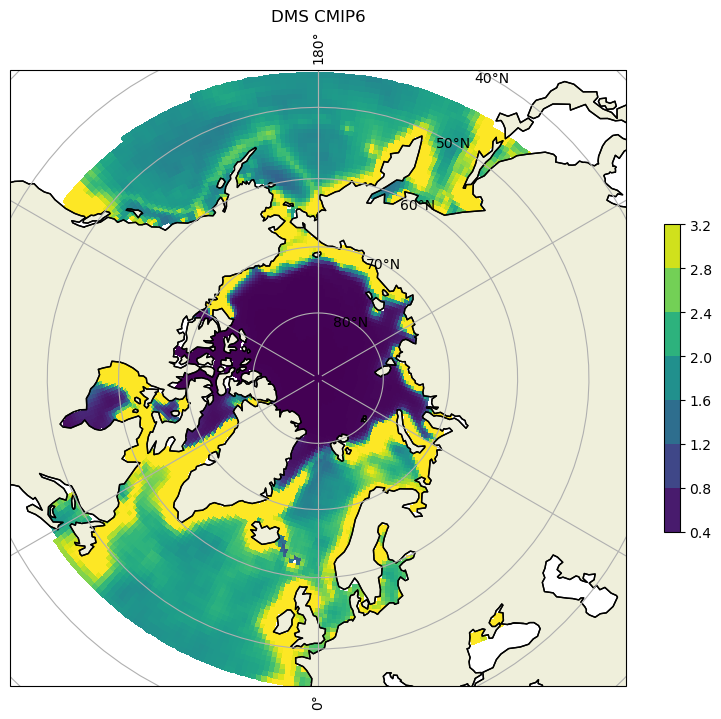

In [91]:
import cartopy
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())
#pl_CMIP6


ax.pcolormesh(dset_GLarea_2011To2014.lon, dset_GLarea_2011To2014.lat,
              1.0e6*dset_GLarea_2011To2014['dmso'].sel(
    time=(cftime.DatetimeGregorian(2014, 6, 16, 0, 0, 0, 0, has_year_zero=False)) ), 
    vmin=0,vmax=4,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_title('DMS CMIP6')
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.colorbar(pl,shrink=0.4)
fig.tight_layout()

(array([3.4977e+04, 6.1770e+03, 1.2920e+03, 3.9000e+02, 1.8500e+02,
        1.5900e+02, 9.2000e+01, 5.5000e+01, 2.5000e+01, 1.3000e+01]),
 array([8.93618957e-09, 2.44802641e-06, 4.88711657e-06, 7.32620674e-06,
        9.76529736e-06, 1.22043875e-05, 1.46434777e-05, 1.70825679e-05,
        1.95216580e-05, 2.19607482e-05, 2.43998384e-05], dtype=float32),
 <BarContainer object of 10 artists>)

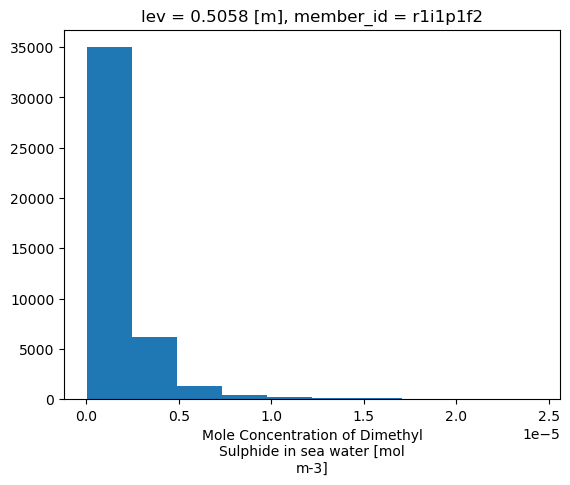

In [16]:
dset_GLarea_2011To2014['dmso'].plot()

## plotting the temporal mean over the Arctic globe

In [92]:
ds_MonAreaMean_2011To2014_Arct = dset_GLarea.mean(dim='time').compute() #.compute does the excution of the mean operation
ds_MonAreaMean_2011To2014_Arct

<xarray.Dataset>
Dimensions:     (y: 80, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 40.93 40.93 41.32 ... 50.11 50.11 49.98
    bounds_lon  (y, x, nvertex) float64 72.02 73.0 73.0 ... 73.0 72.95 73.0
    lat         (y, x) float64 41.13 41.13 41.13 41.13 ... 50.23 50.01 50.01
    lev         float64 0.5058
    lev_bounds  (axis_nbounds) float64 0.0 1.024
    lon         (y, x) float64 72.51 73.49 74.47 75.45 ... 73.04 73.0 72.99
    member_id   <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso        (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

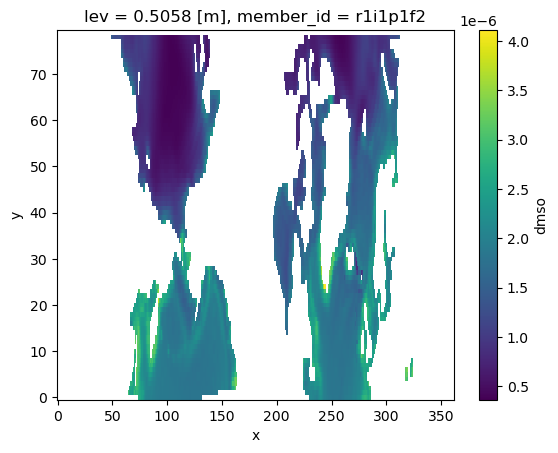

In [93]:
ds_MonAreaMean_2011To2014_Arct['dmso'].plot()

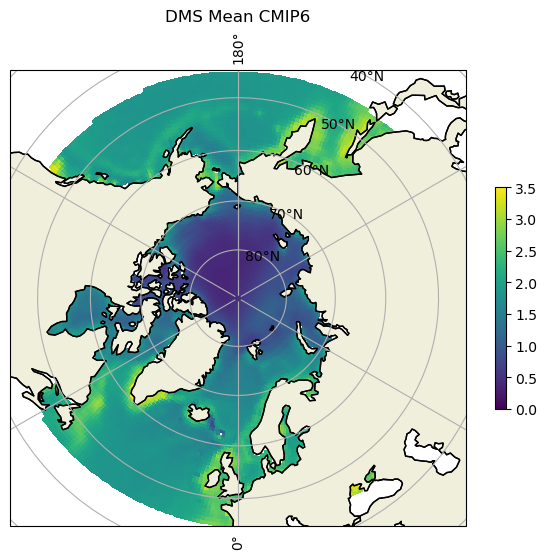

In [119]:
fig, ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())



pl_CMIP6=ax.pcolormesh(ds_MonAreaMean_2011To2014_Arct.lon, ds_MonAreaMean_2011To2014_Arct.lat,
              1.0e6*ds_MonAreaMean_2011To2014_Arct['dmso'], 
    vmin=0,vmax=3.5,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_title('DMS Mean CMIP6')
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.colorbar(pl_CMIP6,shrink=0.4)
fig.tight_layout()

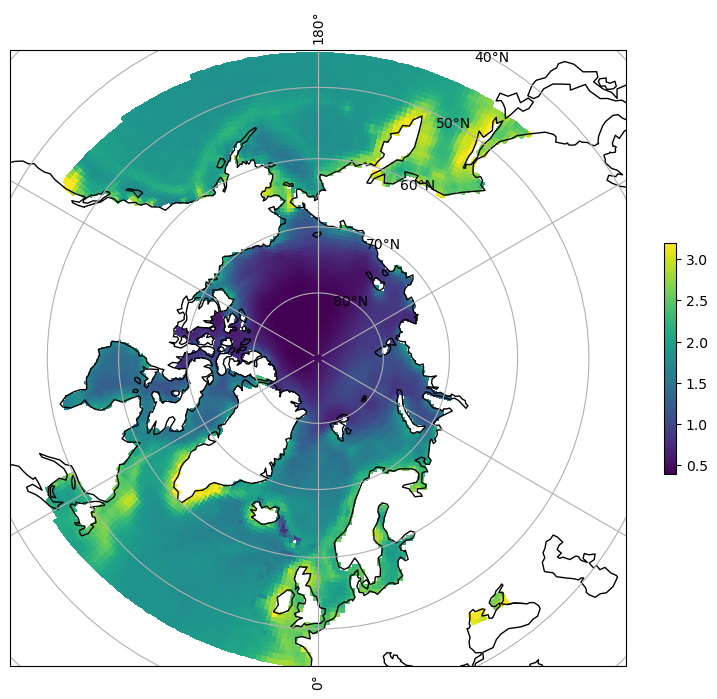

In [122]:
fig, ax = plt.subplots(figsize=(8,8),
                       subplot_kw={'projection':ccrs.NorthPolarStereo()}
                       # subplot_kw={'projection':ccrs.PlateCarree()
                                  )
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())

pl=ax.pcolormesh(ds_MonAreaMean_2011To2014_Arct.lon,ds_MonAreaMean_2011To2014_Arct.lat,
                 ds_MonAreaMean_2011To2014_Arct['dmso']*1.0e6,
    vmin=0.4,vmax=3.2,
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
        )
fig.colorbar(pl,shrink=0.3)
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()

In [127]:
dset_GLarea_2011To2014

<xarray.Dataset>
Dimensions:      (time: 49, y: 80, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 40.93 40.93 41.32 ... 50.11 50.11 49.98
    bounds_lon   (y, x, nvertex) float64 72.02 73.0 73.0 ... 73.0 72.95 73.0
    lat          (y, x) float64 41.13 41.13 41.13 41.13 ... 50.23 50.01 50.01
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 0.0 1.024
    lon          (y, x) float64 72.51 73.49 74.47 75.45 ... 73.04 73.0 72.99
  * time         (time) object 2010-12-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object 2010-12-01 00:00:00 ... 2015-01-...
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

ValueError: x and y can be no greater than 2D, but have shapes (49,) and (49, 80, 362)

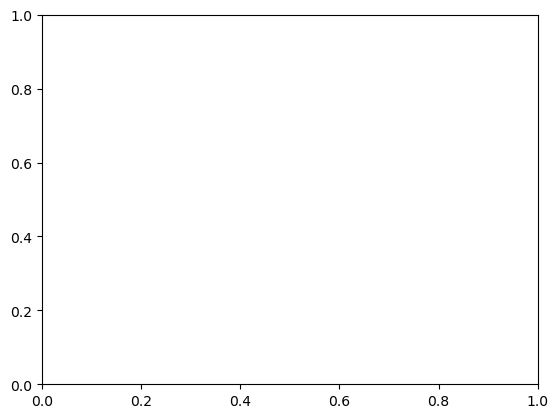

In [128]:
plt.plot(dset_GLarea_2011To2014.dmso)

### open CMIP6 online catalog

In [3]:
## some of the variables, e.g. DMS emission (emidms) and dmsos, are not in pangeo, so we put them in a bucket
## dmsos is DMS at surface 
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
# list avilable data in the bucket
s3.ls('escience2022/Ada/monthly')
dir = 'escience2022/Ada/monthly'
files = [file for file in s3.ls(dir) if 'dmsos' in file ]
#files = [file for file in s3.ls(dir) if 'emidms' in file ]
files

['escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_esm-hist_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_170001-194912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_195001-200912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_185001-185912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_186001-186912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_187001-187912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_188001-188912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_189001-189912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_190001-190912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_191001-191912.nc',
 'escience2022/Ada/mo

## Load and specify the search of the requiered variable, e.g. DMS data, from NorESM2-LM, historical experiment 

In [7]:
cat = col.search(source_id=['CNRM_ESM2-1'], activity_id = ['CMIP'], experiment_id=['historical'], table_id=['Omon'], 
                 variable_id=['dmso'], member_id=['r1i1p1f1']
                )
cat.df

/srv/conda/envs/notebook/lib/python3.9/site-packages/intake_esm/search.py:106: UserWarning: Query returned zero results.
  warn(message)


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version


## Load DMS data from NorESM2-LM, historical experiment if they are in the bucket


In [8]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Ada/monthly/dmsos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
#dmsos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_200001-200912.nc'
#dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc'
#dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_185001-185912.nc'

file = s3.open(s3file)
ds = xr.open_dataset(file)
ds.dmsos

<xarray.DataArray 'dmsos' (time: 1200, j: 330, i: 360)>
[142560000 values with dtype=float32]
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 ...
    longitude  (j, i) float32 ...
Attributes:
    standard_name:   mole_concentration_of_dimethyl_sulfide_in_sea_water
    long_name:       Surface Mole Concentration of Dimethyl Sulphide in Sea W...
    comment:         Mole concentration of dimethyl sulphide in water in the ...
    units:           mol m-3
    original_name:   mo: (variable_name: DMS_SURF)
    original_units:  nmol L-1
    history:         2020-02-28T17:10:38Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello

In [5]:
ds.dmso.isel(time=22).plot(robust=True)

NameError: name 'ds' is not defined

In [10]:

da_plt = ds['dmsos'].isel(time=22)
da_plt

<xarray.DataArray 'dmsos' (j: 330, i: 360)>
[118800 values with dtype=float32]
Coordinates:
    time       object 1851-11-16 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 ...
    longitude  (j, i) float32 ...
Attributes:
    standard_name:   mole_concentration_of_dimethyl_sulfide_in_sea_water
    long_name:       Surface Mole Concentration of Dimethyl Sulphide in Sea W...
    comment:         Mole concentration of dimethyl sulphide in water in the ...
    units:           mol m-3
    original_name:   mo: (variable_name: DMS_SURF)
    original_units:  nmol L-1
    history:         2020-02-28T17:10:38Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello

In [35]:
#from matplotlib.colors import LogNorm

In [12]:
## converting the index i to fit with the coordinate system 
#da_plt['j'] = da_plt['j']*(180/len(da_plt['j']))
#da_plt['j']

<xarray.DataArray 'j' (j: 385)>
array([  0.467532,   0.935065,   1.402597, ..., 179.064935, 179.532468,
       180.      ])
Coordinates:
    time     object 2000-02-15 00:00:00
  * j        (j) float64 0.4675 0.9351 1.403 1.87 ... 178.6 179.1 179.5 180.0

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


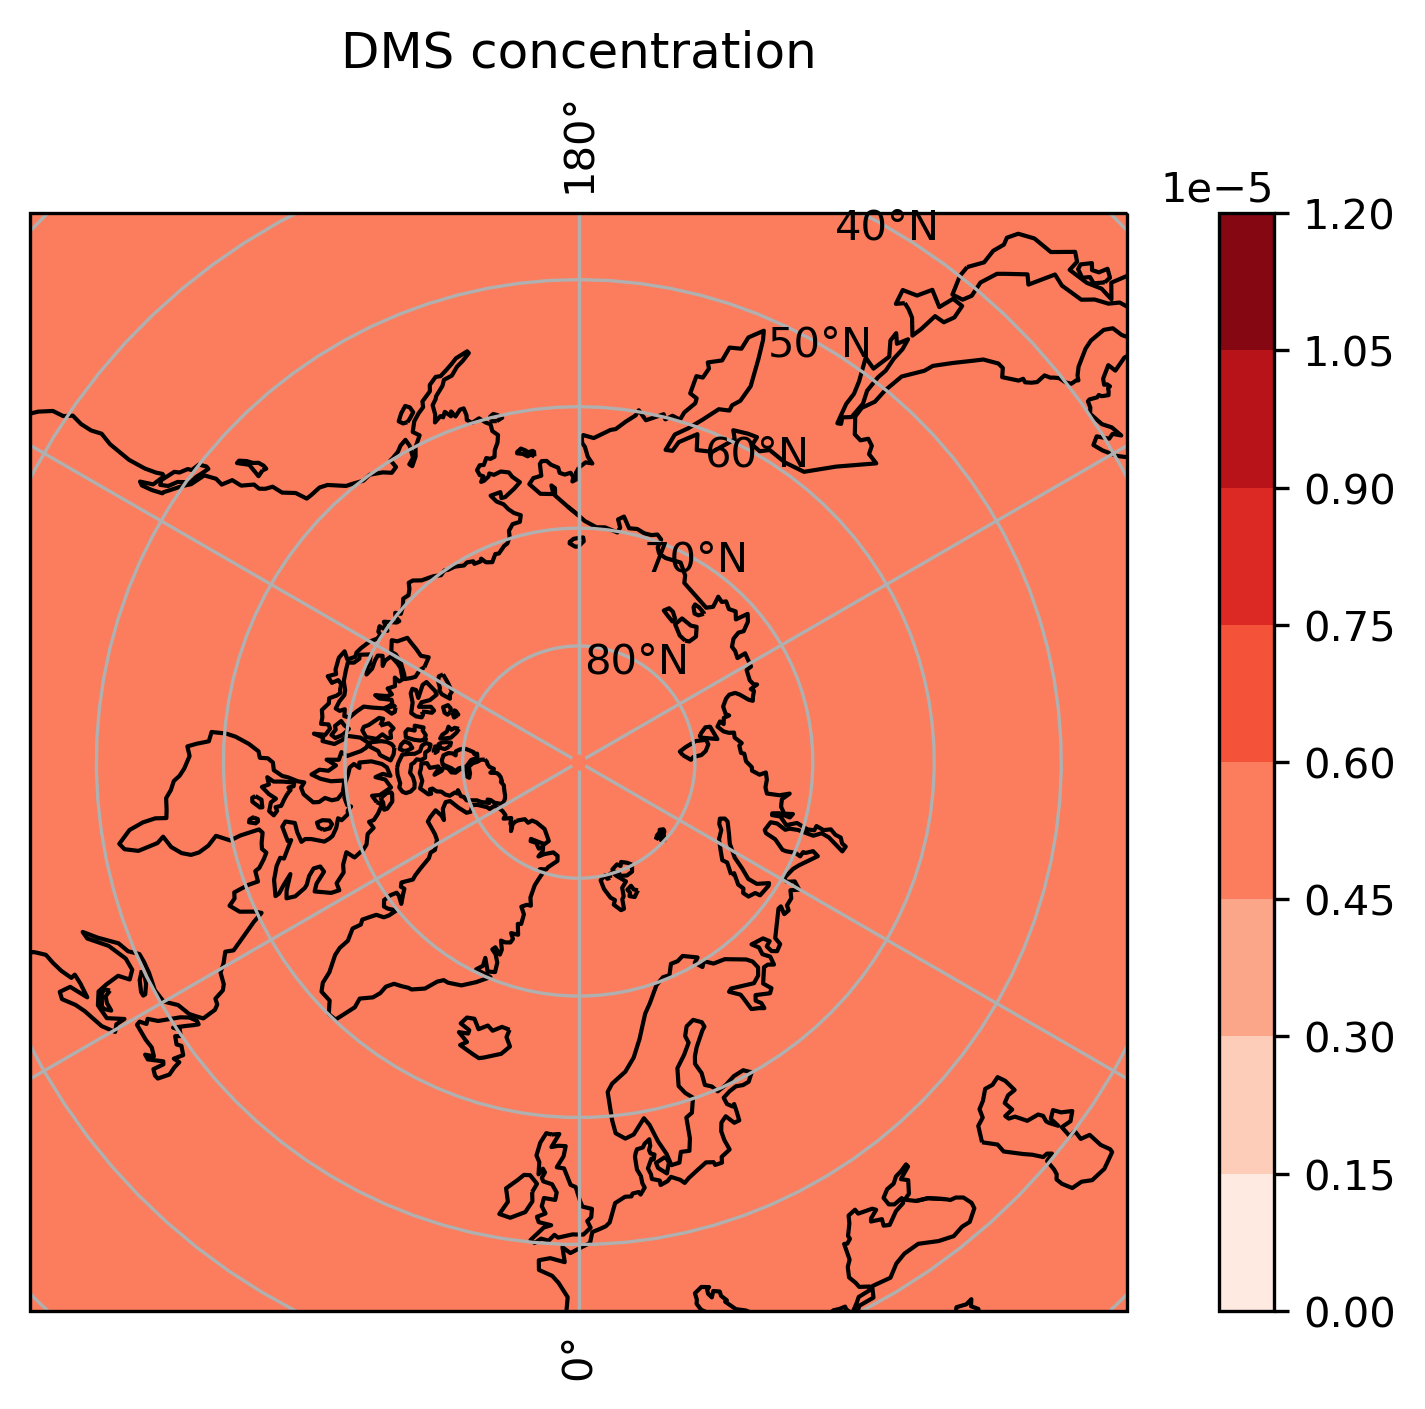

In [11]:
#f,ax = plt.subplots(1,1,dpi=300,subplot_kw={'projection':ccrs.NorthPolarStereo()})
f,ax = plt.subplots(1,dpi=300,subplot_kw={'projection':ccrs.NorthPolarStereo()})#PlateCarree()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())
#da_plt.plot.pcolormesh(
cf = ax.contourf(da_plt.longitude, da_plt.latitude, da_plt,
    cmap = plt.get_cmap('Reds'),
    #ax=ax,
    #norm = LogNorm(),
    cbar_kwargs={
        #'label':'Wind Speed [m/s]', 
        'orientation':'horizontal',
        'shrink':.8
    },
    transform=ccrs.PlateCarree(), 
    #x='lon',y='lat',
    levels = 6
)
ax.set_title('DMS concentration')
ax.coastlines()
plt.colorbar(cf)
gl = ax.gridlines(draw_labels=True)
#gl.xlabels_top = False
#gl.ylabels_right = False
#gl.top_labels(False)
#ax.add_feature(cy.feature.BORDERS);
f.tight_layout()

### correct the corrdinate to get a nicer map

In [ ]:
def convert360_180(_ds):
    """
    convert longitude from 0-360 to -180 -- 180 deg
    """
    # check if already 
    attrs = _ds['i'].attrs
    if _ds['i'].min() >= 0:
        with xr.set_options(keep_attrs=True): 
            _ds.coords['i'] = (_ds['i'] - 180) 
        _ds = _ds.sortby('i')
    return _ds
ds = convert360_180(ds)
ds['i']

### research questions:
- How different models are representing DMS in both historical and maybe in future projection?
- How sea ice and ice-melting with the consequent potential changes in slainity would impact DMS concentration and their fluxes into the atmpsphere?  
- Looking at CMIP6 data
- compare with observations (parametrization based on chlorophyll observation and T and wind)


### open multiple files of observations

In [14]:
s3file = 's3://escience2022/Ada/monthly/'
scfile
file = s3.open(s3file)
file [for file in s3file.ls(dir) if 'NorESM2-LM_esm-hist' in file]
xr.open_mfdataset('s3://escience2022/Ada/monthly/', parallel=True)

#ds = xr.open_dataset(file)
ds.dmsos

ValueError: cannot do wild-card matching for paths that are remote URLs unless engine='zarr' is specified. Got paths: s3://escience2022/Ada/monthly/*.nc. Instead, supply paths as an explicit list of strings.